# Dataset StackOverflow

Loading Libraries

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Preprocessing

### Joining all files into a single one

In [4]:
def join_dfs(folder_path):
    dataframes = []
    
    #Iterate over the files
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):  
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            dataframes.append(df)
            
    #Combine all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

Join Questions

In [5]:
folder_path_questions = 'stackoverflow_2019/questions'
df_questions = join_dfs(folder_path_questions)

Join Answers

In [6]:
folder_path_answer = 'stackoverflow_2019/answers'
df_answers = join_dfs(folder_path_answer)

Clean tags

In [7]:
# Replace NaN with empty strings (if applicable) before processing
df_questions["QuestionTags"] = df_questions["QuestionTags"].fillna("")

# Transform the tags into a list format
df_questions["QuestionTags"] = df_questions["QuestionTags"].apply(lambda tags: tags.split("><") if tags else [])
df_questions["QuestionTags"] = df_questions["QuestionTags"].apply(lambda tags: [tag.strip("<>") for tag in tags])


Save DFs

In [8]:
df_questions.to_csv("dataset/questions_2019.csv", index=False)
df_answers.to_csv("dataset/answers_2019.csv", index=False)

## Analysing Dataset

### Question Data Analysis

In [9]:
df_questions

,QuestionId,QuestionOwnerId,QuestionTitle,QuestionTags,QuestionVotes,QuestionCreationDate,AnswerCount
0,54936100,3419772,R 3.5.2: Error in loading stock data from zoo,[r],0,2019-03-01 00:00:10,1
1,54936106,3997132,Different behaviour of range with lodash/fp,"[functional-programming, lodash]",1,2019-03-01 00:01:48,1
2,54936108,4992551,webPack dev server proxy rewrite URLs in response,"[webpack, webpack-dev-server]",2,2019-03-01 00:01:55,1
3,54936109,2239552,EF Core 2.0 Global Filter,[c#],0,2019-03-01 00:02:36,0
4,54936112,5505171,Clustered column chart in C# using Chart in Wi...,"[c#, winforms, charts, column-chart]",0,2019-03-01 00:02:47,0
...,...,...,...,...,...,...,...
878713,54272409,10245420,Selenium iframe Data issue - python,"[python, selenium, selenium-webdriver, iframe]",1,2019-01-19 23:57:14,1
878714,54272411,8906835,Problem on adding Bootstrap carousel component,"[bootstrap-4, bootstrap-carousel]",0,2019-01-19 23:57:26,1
878715,54272412,10893334,NativeScript Vue nativescript-sqlite cannot as...,"[sqlite, nativescript, nativescript-vue]",0,2019-01-19 23:57:36,1
878716,54272414,10564619,How to fix 'TypeError' that comes up for some ...,"[python, typeerror]",1,2019-01-19 23:57:54,1


In [10]:
df_questions.shape

(878718, 7)

Answers Distribution

In [11]:
# Value counts with percentage
value_counts = df_questions["AnswerCount"].value_counts()
percentages = (value_counts / len(df_questions)) * 100

# Combine into a single DataFrame
result = pd.DataFrame({
    "Count": value_counts,
    "Percentage": percentages
}).reset_index()

result.columns = ["AnswerCount", "Count", "Percentage"]

# Display the result
print(result)

    AnswerCount   Count  Percentage
0             1  476150   54.186895
1             2  166587   18.957959
2             0  155835   17.734358
3             3   51912    5.907697
4             4   16960    1.930085
5             5    6034    0.686682
6             6    2343    0.266638
7             7    1071    0.121882
8             8     597    0.067940
9             9     337    0.038351
10           10     205    0.023329
11           11     132    0.015022
12           12     107    0.012177
13           13      84    0.009559
14           14      57    0.006487
15           15      45    0.005121
16           16      38    0.004324
17           18      32    0.003642
18           17      27    0.003073
19           21      22    0.002504
20           20      20    0.002276
21           23      16    0.001821
22           19      15    0.001707
23           22      11    0.001252
24           27      10    0.001138
25           24       9    0.001024
26           28       9    0

Text(0.5, 0, 'Number of Answers')

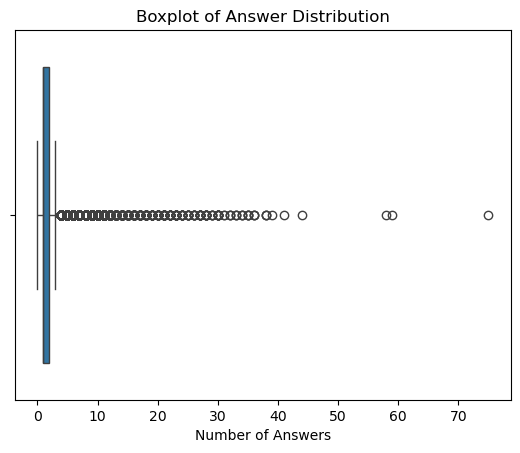

In [12]:
sns.boxplot(data=df_questions, x="AnswerCount")
plt.title("Boxplot of Answer Distribution")
plt.xlabel("Number of Answers")

#### Tags

Number of Unique tags

In [13]:
all_tags = [tag for tags in df_questions["QuestionTags"] for tag in tags]
len(set(all_tags))

35380

Number of tags distribution

In [14]:
df_questions["NumTags"] = df_questions["QuestionTags"].apply(len)
df_questions["NumTags"].value_counts()

NumTags
3    249774
2    245804
4    161642
1    118277
5    102878
0       332
6        11
Name: count, dtype: int64

Most recurring tags

In [15]:
all_tags = [tag for tags in df_questions["QuestionTags"] for tag in tags]
tag_counts = Counter(all_tags)
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).sort_values(by="Count", ascending=False)
tag_counts_df.head(10)

,Tag,Count
11,python,107424
37,javascript,92951
25,java,64052
5,c#,50201
17,android,42889
9,php,40793
79,html,37757
92,python-3.x,28890
14,reactjs,27362
76,angular,25651


### Answer Data Analysis

In [16]:
df_answers.head()

,QuestionId,AnswerOwnerId,AnswerVotes,AnswerCreationDate
0,56140111,10245958,3,2019-05-15 00:07:23
1,56140157,1226963,0,2019-05-15 00:12:34
2,56140125,6841773,0,2019-05-15 00:12:44
3,56140150,1440565,5,2019-05-15 00:12:52
4,56140150,11015427,15,2019-05-15 00:16:46


In [17]:
df_answers.shape

(1105677, 4)

Get number of users

In [18]:
df_answers["AnswerOwnerId"].nunique()

283278

Upvotes (Verifying negative)

In [23]:
df_answers["AnswerVotes"][df_answers["AnswerVotes"]<0].count()

26380

Verifying number of answers by users

In [35]:
answer_distribution = df_answers.groupby("AnswerOwnerId").size().reset_index(name="AnswerCount")
answer_distribution = answer_distribution.sort_values(by="AnswerCount", ascending=False)
answer_distribution.head(20)

,AnswerOwnerId,AnswerCount
29546,1144035,5614
70053,2901002,2600
85894,3732271,2031
163924,7964527,1768
47833,1863229,1657
204009,10221765,1466
209784,10498828,1429
37612,1447675,1415
38778,1491895,1274
90393,3962914,1206


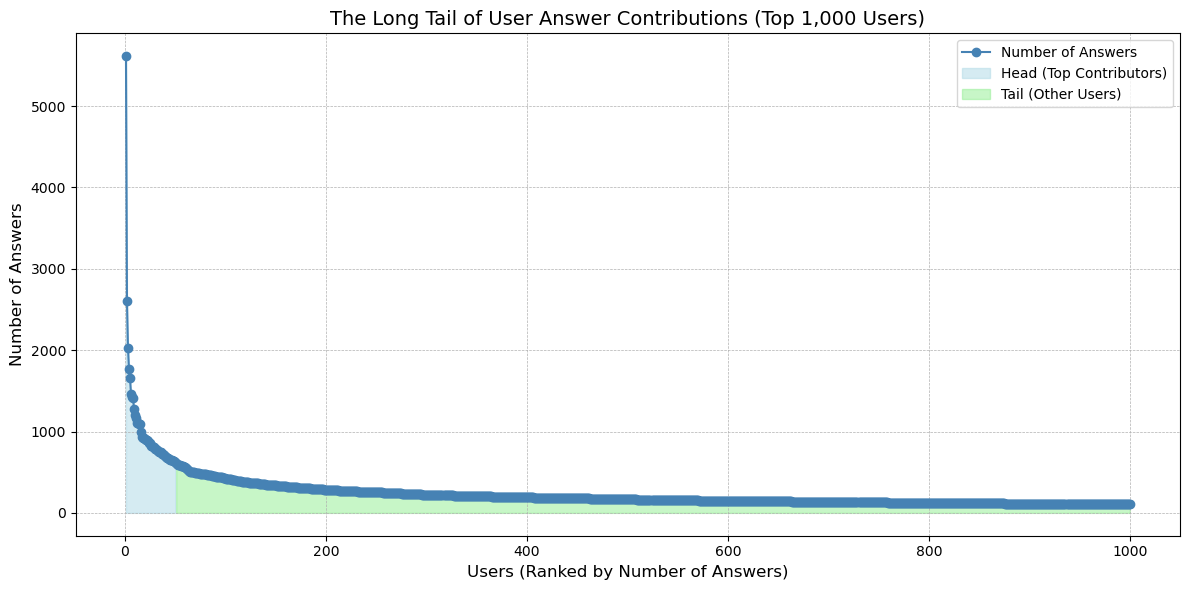

In [36]:
# Step 1: Count the number of answers per user
answer_distribution = df_answers.groupby("AnswerOwnerId").size().reset_index(name="AnswerCount")

# Step 2: Sort the distribution (descending order by AnswerCount)
answer_distribution = answer_distribution.sort_values(by="AnswerCount", ascending=False).reset_index(drop=True)

# Step 3: Slice the top 1,000 users
top_users = answer_distribution.head(1000)
x = np.arange(1, len(top_users) + 1)  # Rank of users
y = top_users["AnswerCount"]         # Number of answers

# Step 4: Plot the Long Tail for Top 1,000 Users
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker="o", linestyle="-", color="steelblue", label="Number of Answers")

# Add shaded regions for "Head" and "Tail"
head_cutoff = 50  # Define the number of top contributors in the "Head"
plt.fill_between(x[:head_cutoff], y[:head_cutoff], color="lightblue", alpha=0.5, label="Head (Top Contributors)")
plt.fill_between(x[head_cutoff:], y[head_cutoff:], color="lightgreen", alpha=0.5, label="Tail (Other Users)")

# Add labels and customize ticks
plt.title("The Long Tail of User Answer Contributions (Top 1,000 Users)", fontsize=14)
plt.xlabel("Users (Ranked by Number of Answers)", fontsize=12)
plt.ylabel("Number of Answers", fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
